In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MacOS - 한글 폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Graph Style
import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
doc_1 = "What a tasty cake!"
doc_2 = "It's a cake! chocolate cake!"
doc_3 = "The Cake Movie."

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
vectorizer = CountVectorizer(stop_words='english')
docs = [doc_1, doc_2, doc_3]
matrix = vectorizer.fit_transform(docs)

In [5]:
matrix.todense()

matrix([[1, 0, 0, 1],
        [2, 1, 0, 0],
        [1, 0, 1, 0]])

In [6]:
vectorizer.get_feature_names()

['cake', 'chocolate', 'movie', 'tasty']

In [7]:
df_words = pd.DataFrame(
    data=matrix.todense(), 
    index=['doc_1','doc_2','doc_3'],
    columns=vectorizer.get_feature_names())

df_words

,cake,chocolate,movie,tasty
doc_1,1,0,0,1
doc_2,2,1,0,0
doc_3,1,0,1,0


In [8]:
doc_dict = {
    'doc_1':doc_1,
    'doc_2':doc_2,
    'doc_3':doc_3,
}

In [9]:
print('doc_1: ',doc_dict['doc_1'])
print('doc_2: ',doc_dict['doc_2'])
print('doc_3: ',doc_dict['doc_3'])

doc_1:  What a tasty cake!
doc_2:  It's a cake! chocolate cake!
doc_3:  The Cake Movie.


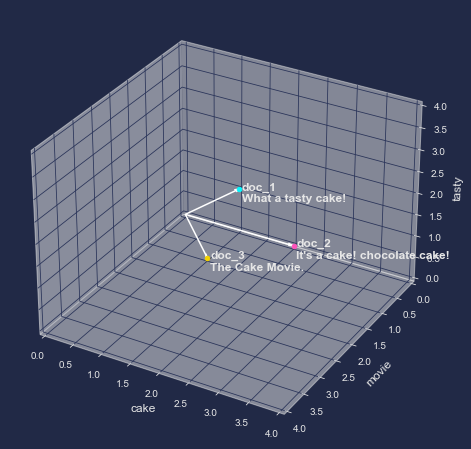

In [10]:
x_label = 'cake'
y_label = 'movie'
z_label = 'tasty'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for i, df_word in df_words.iterrows():
    x = df_word[x_label]
    y = df_word[y_label]
    z = df_word[z_label]
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,x,y,z,
              arrow_length_ratio=0.1/vec_len)
    ax.text((x+0.05),y,(z-0.3), 
            s=f'{i}\n{doc_dict[i]}',
            size=12,
            fontweight='bold')
    ax.scatter(x,y,z)
              
        
ax.set_xlim(0,4)
ax.set_ylim(4,0)
ax.set_zlim(0,4)


ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)

plt.show()

In [11]:
doc_dict

{'doc_1': 'What a tasty cake!',
 'doc_2': "It's a cake! chocolate cake!",
 'doc_3': 'The Cake Movie.'}

In [12]:
dst_1_2 = np.linalg.norm(df_words.loc['doc_1'] - df_words.loc['doc_2'])
dst_2_3 = np.linalg.norm(df_words.loc['doc_2'] - df_words.loc['doc_3'])

print('='*20)
print(f"doc_1 : {doc_dict['doc_1']}")
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"distance(doc_1~doc_2): {round(dst_1_2,2)}")

print('='*20)
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"doc_3 : {doc_dict['doc_3']}")
print(f"distance(doc_2~doc_3): {round(dst_2_3,2)}")

doc_1 : What a tasty cake!
doc_2 : It's a cake! chocolate cake!
distance(doc_1~doc_2): 1.73
doc_2 : It's a cake! chocolate cake!
doc_3 : The Cake Movie.
distance(doc_2~doc_3): 1.73


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
def get_cos_dst(a, b):
    dst = np.dot(a, b)
    dst /= (np.linalg.norm(a)*np.linalg.norm(b))
    dst = 1-dst
    return dst

cos_dst_1_2 = get_cos_dst(df_words.loc['doc_1'], 
                          df_words.loc['doc_2'])
cos_dst_2_3 = get_cos_dst(df_words.loc['doc_2'], 
                          df_words.loc['doc_3'])



print('='*20)
print(f"doc_1 : {doc_dict['doc_1']}")
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"euclidean distance: {round(dst_1_2,2)}")
print(f"cosine distance: {round(cos_dst_1_2,2)}")

print('='*20)
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"doc_3 : {doc_dict['doc_3']}")
print(f"euclidean distance: {round(dst_2_3,2)}")
print(f"cosine distance: {round(cos_dst_2_3,2)}")

doc_1 : What a tasty cake!
doc_2 : It's a cake! chocolate cake!
euclidean distance: 1.73
cosine distance: 0.37
doc_2 : It's a cake! chocolate cake!
doc_3 : The Cake Movie.
euclidean distance: 1.73
cosine distance: 0.37


## Step 2. 단어 빈도가 많아진다면?

In [15]:
doc_1_extend = ' '.join([doc_1]*5)
doc_1_extend

'What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake!'

In [16]:
docs_with_extend = [doc_1_extend, doc_2, doc_3]
matrix_with_extend = vectorizer.fit_transform(docs_with_extend, matrix)

df_words_with_extend = pd.DataFrame(
    data=matrix_with_extend.todense(), 
    index=['doc_1_extend','doc_2','doc_3'],
    columns=vectorizer.get_feature_names())

df_words_with_extend

,cake,chocolate,movie,tasty
doc_1_extend,5,0,0,5
doc_2,2,1,0,0
doc_3,1,0,1,0


In [17]:
doc_dict_with_extend = {
    'doc_1_extend':doc_1_extend,
    'doc_2':doc_2,
    'doc_3':doc_3,
}
print('doc_1: ',doc_dict_with_extend['doc_1_extend'])
print('doc_2: ',doc_dict_with_extend['doc_2'])
print('doc_3: ',doc_dict_with_extend['doc_3'])

doc_1:  What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake!
doc_2:  It's a cake! chocolate cake!
doc_3:  The Cake Movie.


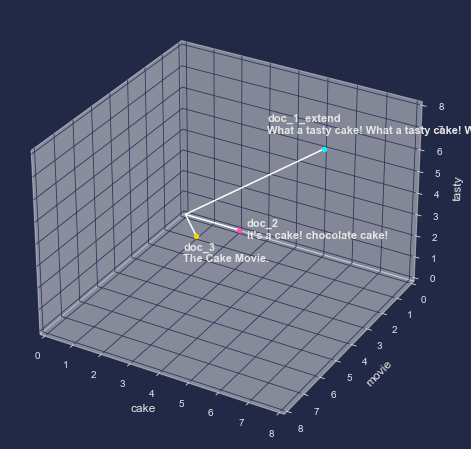

In [18]:
x_label = 'cake'
y_label = 'movie'
z_label = 'tasty'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for i, df_word in df_words_with_extend.iterrows():
    x = df_word[x_label]
    y = df_word[y_label]
    z = df_word[z_label]
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,x,y,z,
              arrow_length_ratio=0.1/vec_len)
    
    if i=='doc_1_extend':
        text_loc = ((x-2), y, (z))
    if i=='doc_2':
        text_loc = ((x+0.3), y, (z-0.3))
    if i=='doc_3':
        text_loc = ((x-0.5), y, (z-1.5))
    ax.text(*text_loc, 
            s=f'{i}\n{doc_dict_with_extend[i]}',
            size=11,
            fontweight='bold')
    ax.scatter(x,y,z)
              
        
ax.set_xlim(0,8)
ax.set_ylim(8,0)
ax.set_zlim(0,8)


ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)

plt.show()

In [19]:
dst_1_2_with_extend = np.linalg.norm(df_words_with_extend.loc['doc_1_extend'] - df_words_with_extend.loc['doc_2'])
dst_2_3_with_extend = np.linalg.norm(df_words_with_extend.loc['doc_2'] - df_words_with_extend.loc['doc_3'])

cos_dst_1_2_with_extend = get_cos_dst(df_words_with_extend.loc['doc_1_extend'], 
                          df_words_with_extend.loc['doc_2'])
cos_dst_2_3_with_extend = get_cos_dst(df_words_with_extend.loc['doc_2'], 
                          df_words_with_extend.loc['doc_3'])



print('='*20)
print(f"doc_1 : {doc_dict_with_extend['doc_1_extend']}")
print(f"doc_2 : {doc_dict_with_extend['doc_2']}")
print(f"euclidean distance: {round(dst_1_2_with_extend,2)}")
print(f"cosine distance: {round(cos_dst_1_2_with_extend,2)}")

print('='*20)
print(f"doc_2 : {doc_dict_with_extend['doc_2']}")
print(f"doc_3 : {doc_dict_with_extend['doc_3']}")
print(f"euclidean distance: {round(dst_2_3_with_extend,2)}")
print(f"cosine distance: {round(cos_dst_2_3_with_extend,2)}")

doc_1 : What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake!
doc_2 : It's a cake! chocolate cake!
euclidean distance: 5.92
cosine distance: 0.37
doc_2 : It's a cake! chocolate cake!
doc_3 : The Cake Movie.
euclidean distance: 1.73
cosine distance: 0.37


## Step 3. 다시 돌아가서, 단순히 단어가 아니라 의미를 본다면? 

doc_1과 doc_2의 토픽은 케이크, doc_2의 토픽은 영화다.

그렇다면 doc_1과 doc_2의 유사도는 doc_2와 doc_2의 유사도보다 높아야 한다. 이렇게 의미상 유사도는 어떻게 계산할 수 있을까?  
즉, doc_1과 doc_2는 더 가깝게, doc_3은 조금 더 멀리 떨어뜨릴 수는 없을까?

In [20]:
from gensim import downloader, corpora, utils

In [21]:
fasttext = downloader.load('fasttext-wiki-news-subwords-300')
fasttext

In [23]:
fasttext.word_vec('movie')

array([-0.063386  , -0.074039  , -0.01791   ,  0.11879   ,  0.020304  ,
       -0.025058  ,  0.022974  , -0.12892   ,  0.070839  ,  0.070985  ,
        0.051102  , -0.06328   ,  0.11964   , -0.059135  , -0.16655   ,
       -0.017505  ,  0.13078   , -0.024237  ,  0.037903  , -0.029335  ,
        0.020504  , -0.084799  , -0.014779  ,  0.082775  ,  0.021256  ,
       -0.0039036 ,  0.038177  ,  0.027162  ,  0.042865  ,  0.098359  ,
       -0.093031  , -0.0066163 ,  0.01608   , -0.086323  ,  0.062969  ,
       -0.0037037 , -0.014836  , -0.011857  ,  0.035124  , -0.031741  ,
       -0.031867  , -0.097423  ,  0.0010919 , -0.061288  ,  0.01757   ,
        0.060311  ,  0.092537  , -0.061333  , -0.013193  ,  0.012152  ,
        0.057742  ,  0.029646  ,  0.033386  ,  0.022229  , -0.060602  ,
       -0.020832  ,  0.0277    , -0.098722  , -0.10058   , -0.029631  ,
        0.018319  , -0.0084914 ,  0.1391    ,  0.0068764 ,  0.084484  ,
        0.0073442 ,  0.050864  , -0.0034739 , -0.037454  ,  0.09

In [24]:
fasttext.word_vec('movie').shape

(300,)

In [25]:
fasttext.most_similar('movie', topn=10)

[('film', 0.8769422769546509),
 ('movie-', 0.8271825313568115),
 ('movies', 0.7997194528579712),
 ('film--', 0.7811052799224854),
 ('movie.', 0.7665870189666748),
 ('film.', 0.7414735555648804),
 ('filmdom', 0.7352851629257202),
 ('mini-movie', 0.729194164276123),
 ('films', 0.7288245558738708),
 ('moviehouse', 0.728100061416626)]

In [27]:
sim = get_cos_dst(fasttext.word_vec('movie'), fasttext.word_vec('film'))
sim

0.1230577826499939

앞에서 만든 함수로 동일한 결과 확인 가능.

유사도와 반대로, 거리는 1-유사도로 계산할 수 있고, fasttext의 함수를 사용할 수 있다.

In [28]:
print('1-sim: ', round(1-sim, 5))
print('fasttext.distance(): ', round(fasttext.distance('movie', 'film'), 5))

1-sim:  0.87694
fasttext.distance():  0.12306


In [29]:
sim = get_cos_dst(fasttext.word_vec('movie'), fasttext.word_vec('cake'))
print('distance(movie ~ cake): ', round(1-sim, 5))

distance(movie ~ cake):  0.30908


In [30]:
sim = get_cos_dst(fasttext.word_vec('movie'), fasttext.word_vec('tasty'))
print('distance(movie ~ cake): ', round(1-sim, 5))

distance(movie ~ cake):  0.32179


In [31]:
sim = get_cos_dst(fasttext.word_vec('cake'), fasttext.word_vec('tasty'))
print('distance(movie ~ cake): ', round(1-sim, 5))

distance(movie ~ cake):  0.49495


cake와 tasty는 가깝다

In [32]:
target_words = ['movie','cake','tasty']
sim_words_1 = [x[0] for x in fasttext.most_similar(target_words[0], topn=200)]
sim_words_2 = [x[0] for x in fasttext.most_similar(target_words[1], topn=200)]
sim_words_3 = [x[0] for x in fasttext.most_similar(target_words[2], topn=200)]


all_words = target_words + sim_words_1 + sim_words_2 + sim_words_3

In [33]:
#sample
all_words[-10:]

['sweet-',
 'hoppy',
 'winy',
 'punchy',
 'eye-poppingly',
 'no-bake',
 'inedible',
 'interesting-sounding',
 'zesty',
 'home-baked']

In [34]:
word_vecs_300d = np.array([fasttext.word_vec(x) for x in all_words])

In [35]:
word_vecs_300d.shape

(603, 300)

600개 단어, 각 단어별 300차원 벡터

In [36]:
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
comps = pca_3d.fit_transform(word_vecs_300d)
df_comps = pd.DataFrame(comps, 
                        columns=['comp_1','comp_2','comp_3'], 
                        index=all_words)
df_comps

,comp_1,comp_2,comp_3
movie,-0.494765,0.195335,0.387309
cake,0.593467,0.553232,0.220724
tasty,0.406943,-0.395995,0.359495
film,-0.589119,0.275998,0.438312
movie-,-0.373884,0.040159,0.098519
...,...,...,...
no-bake,0.138899,-0.038788,-0.044874
inedible,0.174704,-0.191897,-0.053483
interesting-sounding,-0.095999,-0.145336,-0.216588
zesty,0.180600,-0.317791,0.225439


In [37]:
df_comps.max()

comp_1    0.611588
comp_2    0.553232
comp_3    0.482131
dtype: float32

In [38]:
df_comps.min()

comp_1   -0.589119
comp_2   -0.511692
comp_3   -0.216588
dtype: float32

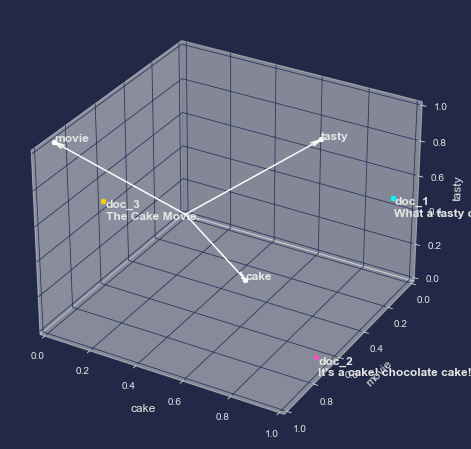

In [39]:
comp_1_label = 'comp_1'
comp_2_label = 'comp_2'
comp_3_label = 'comp_3'


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

target_words = ['movie','cake','tasty']
df_targets = df_comps.loc[target_words]
for word, word_vec in df_targets.iterrows():
    comp_1 = word_vec[comp_1_label]
    comp_2 = word_vec[comp_2_label]
    comp_3 = word_vec[comp_3_label]
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,comp_1,comp_2,comp_3,
              arrow_length_ratio=0.1/vec_len)
    ax.text(comp_1,comp_2,comp_3, 
            s=word,
            size=12,
            fontweight='bold',
            )
    ax.scatter(comp_1,comp_2,comp_3, c='white')

docs_origin_pos = df_words[target_words]
for i, doc_pos in docs_origin_pos.iterrows():
    
    # 선형 변환
    x, y, z = doc_pos.dot(df_targets)
    
    ax.text((x+0.01),y,(z-0.1), 
            s=f'{i}\n{doc_dict[i]}',
            size=12,
            fontweight='bold')
    
    ax.scatter(x,y,z)
    

ax.set_xlim(0,1)
ax.set_ylim(1,0)
ax.set_zlim(0,1)


ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)


plt.show()

In [40]:
df_targets

,comp_1,comp_2,comp_3
movie,-0.494765,0.195335,0.387309
cake,0.593467,0.553232,0.220724
tasty,0.406943,-0.395995,0.359495


In [41]:
df_words[target_words]

,movie,cake,tasty
doc_1,0,1,1
doc_2,0,2,0
doc_3,1,1,0


In [42]:
np.array([0,1,1]).dot(df_targets)

array([1.00041011, 0.15723622, 0.58021905])

In [43]:
df_word[['movie','cake','tasty']]

movie    1
cake     1
tasty    0
Name: doc_3, dtype: int64

In [44]:
word_vec

comp_1    0.406943
comp_2   -0.395995
comp_3    0.359495
Name: tasty, dtype: float32

In [45]:
df_targets

,comp_1,comp_2,comp_3
movie,-0.494765,0.195335,0.387309
cake,0.593467,0.553232,0.220724
tasty,0.406943,-0.395995,0.359495


In [46]:
df_words[['movie','cake','tasty']]

,movie,cake,tasty
doc_1,0,1,1
doc_2,0,2,0
doc_3,1,1,0


In [47]:
df_words[['movie','cake','tasty']].dot(df_targets)

,comp_1,comp_2,comp_3
doc_1,1.000410,0.157236,0.580219
doc_2,1.186935,1.106463,0.441448
doc_3,0.098702,0.748567,0.608033


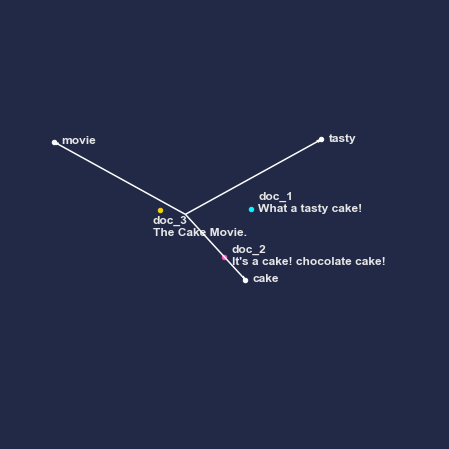

In [48]:
comp_1_label = 'comp_1'
comp_2_label = 'comp_2'
comp_3_label = 'comp_3'


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

target_words = ['movie','cake','tasty']
df_targets = df_comps.loc[target_words]
for word, word_vec in df_targets.iterrows():
    comp_1 = word_vec[comp_1_label]*3
    comp_2 = word_vec[comp_2_label]*3
    comp_3 = word_vec[comp_3_label]*3
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,comp_1,comp_2,comp_3,
              arrow_length_ratio=0.03/vec_len,)
    ax.text((comp_1+0.1),comp_2,comp_3, 
            s=word,
            size=12,
            fontweight='bold',
            )
    ax.scatter(comp_1,comp_2,comp_3, c='white')

docs_origin_pos = df_words[target_words]
for i, doc_pos in docs_origin_pos.iterrows():
    
    # 선형 변환
    x, y, z = doc_pos.dot(df_targets)
    if i=='doc_1':
            text_loc = ((x+0.1), y, (z))
    if i=='doc_2':
        text_loc = ((x+0.1), y, (z-0.1))
    if i=='doc_3':
        text_loc = ((x-0.1), y, (z-0.5))
    ax.text(*text_loc, 
            s=f'{i}\n{doc_dict[i]}',
            size=12,
            fontweight='bold')
    
    ax.scatter(x,y,z)
    

ax.set_xlim(0,3)
ax.set_ylim(3,0)
ax.set_zlim(0,3)


ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)

ax.axis('off')

plt.show()

In [49]:
df_doc_trans_pos = docs_origin_pos.dot(df_targets)
df_doc_trans_pos

,comp_1,comp_2,comp_3
doc_1,1.000410,0.157236,0.580219
doc_2,1.186935,1.106463,0.441448
doc_3,0.098702,0.748567,0.608033


In [50]:
dst_trans_1_2 = np.linalg.norm(df_doc_trans_pos.loc['doc_1'] - df_doc_trans_pos.loc['doc_2'])
dst_trans_2_3 = np.linalg.norm(df_doc_trans_pos.loc['doc_2'] - df_doc_trans_pos.loc['doc_3'])


cos_dst_trans_1_2 = get_cos_dst(df_doc_trans_pos.loc['doc_1'],
                               df_doc_trans_pos.loc['doc_2'])
cos_dst_trans_2_3 = get_cos_dst(df_doc_trans_pos.loc['doc_2'],
                               df_doc_trans_pos.loc['doc_3'])


print('='*20)
print(f"doc_1 : {doc_dict['doc_1']}")
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"euclidean distance: {round(dst_trans_1_2,2)}")
print(f"cosine distance: {round(cos_dst_trans_1_2,2)}")

print('='*20)
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"doc_3 : {doc_dict['doc_3']}")
print(f"euclidean distance: {round(dst_trans_2_3,2)}")
print(f"cosine distance: {round(cos_dst_trans_2_3,2)}")

doc_1 : What a tasty cake!
doc_2 : It's a cake! chocolate cake!
euclidean distance: 0.98
cosine distance: 0.18
doc_2 : It's a cake! chocolate cake!
doc_3 : The Cake Movie.
euclidean distance: 1.16
cosine distance: 0.26
